<a href="https://colab.research.google.com/github/EloneSampaio/data_science/blob/master/Sanfrancisco_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as bibliotecas básicas


In [15]:
import numpy as np
import pandas as pd

#para visualização

import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [16]:
!pip install squarify

In [17]:
import squarify


#Importar dados e preprocessar os dados

In [4]:
data= pd.read_csv('/content/drive/My Drive/DataAnalise/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [ ]:
data.head()

In [6]:
data.shape

(150500, 13)

In [7]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [9]:
#verificando o número de lihas vazias

data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [10]:
data['PdDistrict'].fillna( data['PdDistrict'].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

#Visualização dos dados

##Plotando um tree map dos dados 

###plotaremos um tree map dos 25 crimes mais comuns

###Conceito teorico de tree map encontra-se nesse link abaixo

https://medium.com/@aldinopolo/fazendo-treemap-em-python-com-squarify-e-matplotlib-4ebf8b05b60

In [12]:
y=data['Category'].value_counts().head(25)

In [13]:
y

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
Name: Category, dtype: int64

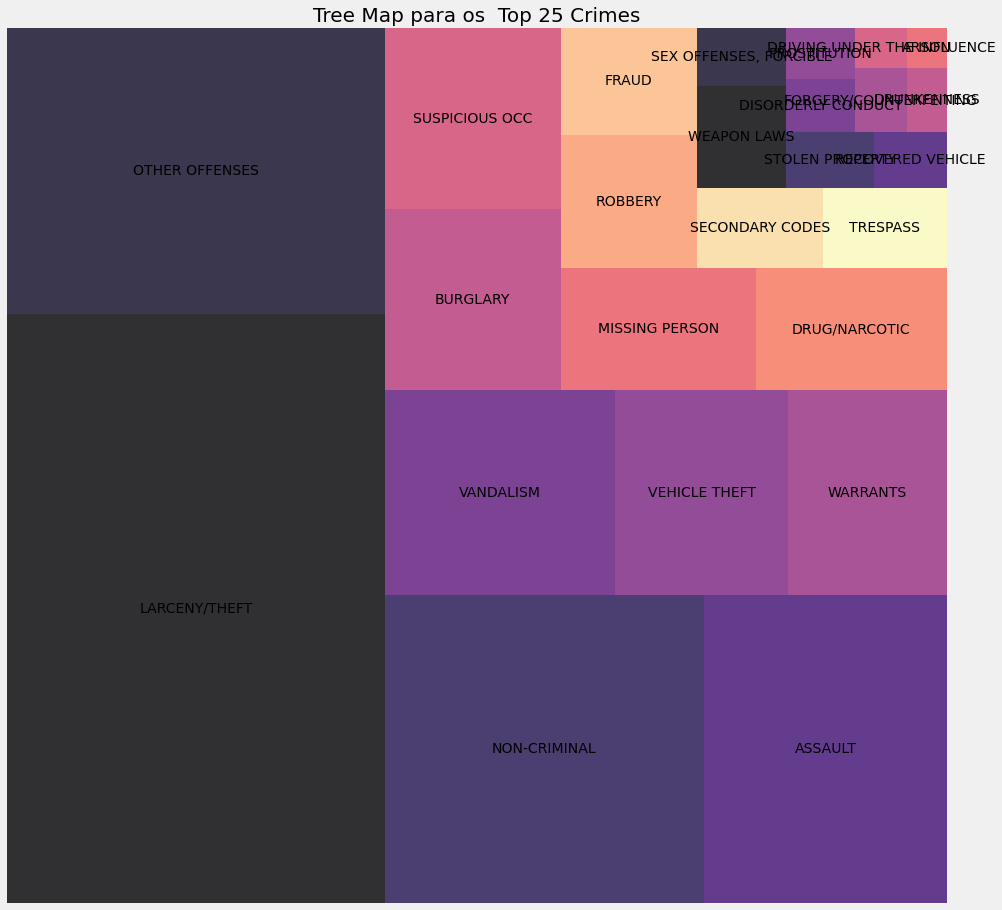

In [18]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)

plt.title('Tree Map para os  Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

#Gráfico de barras verticas 

###gráfico para diferentes categorias de crimes

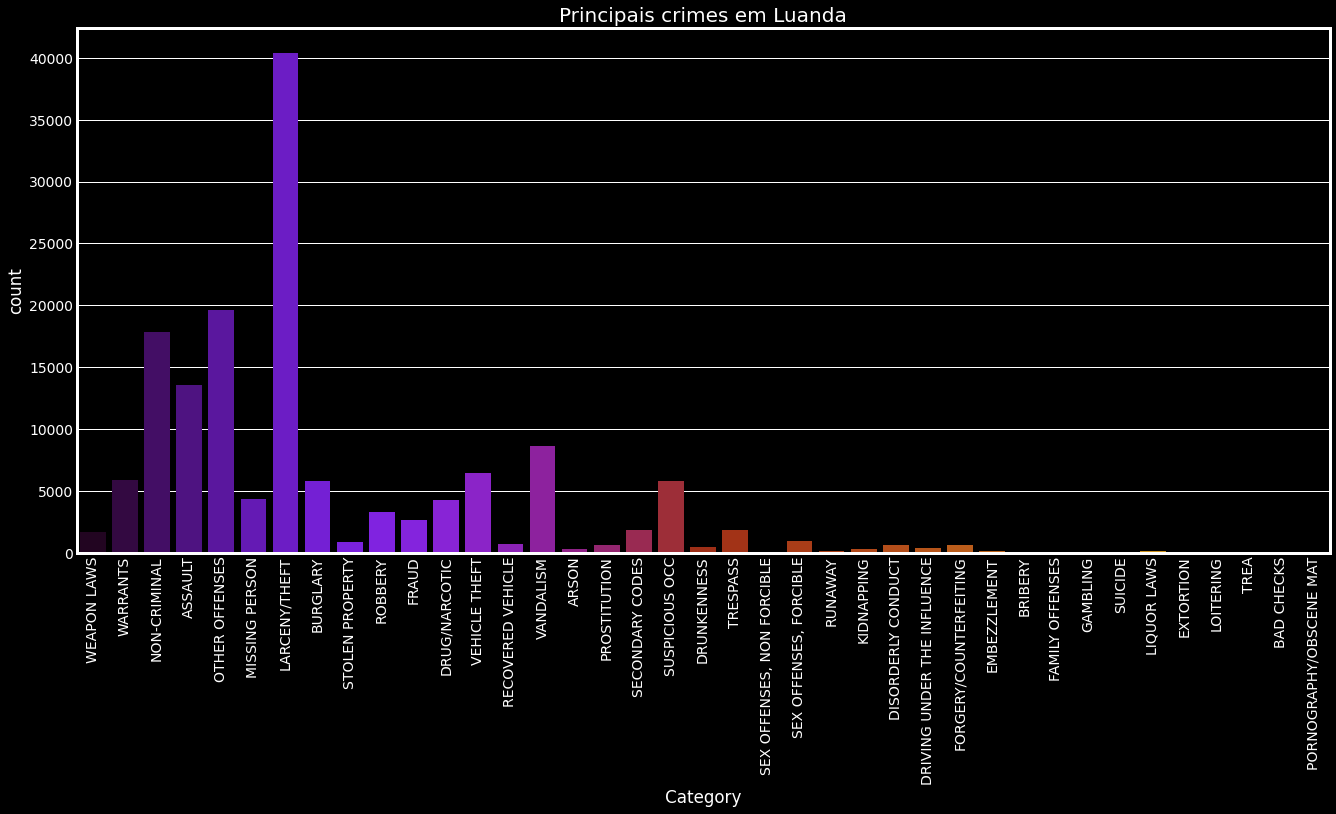

In [22]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')
sns.countplot(data['Category'],palette='gnuplot')
plt.title('Principais crimes em Luanda',fontweight=30,fontsize=20)
plt.xticks(rotation=90)
plt.show()

#Gráfico de descrição das categorias dos crimes

In [23]:
from wordcloud import  WordCloud

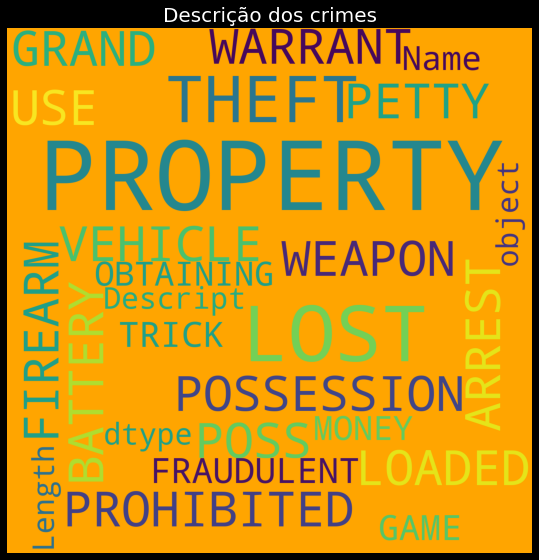

In [24]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')


wc=WordCloud(background_color='orange',width=1500,height=1500).generate(str(data['Descript']))
plt.title('Descrição dos crimes',fontsize=20)
plt.imshow(wc)
plt.axis('off')
plt.show()

#Municípios com maiores crimes

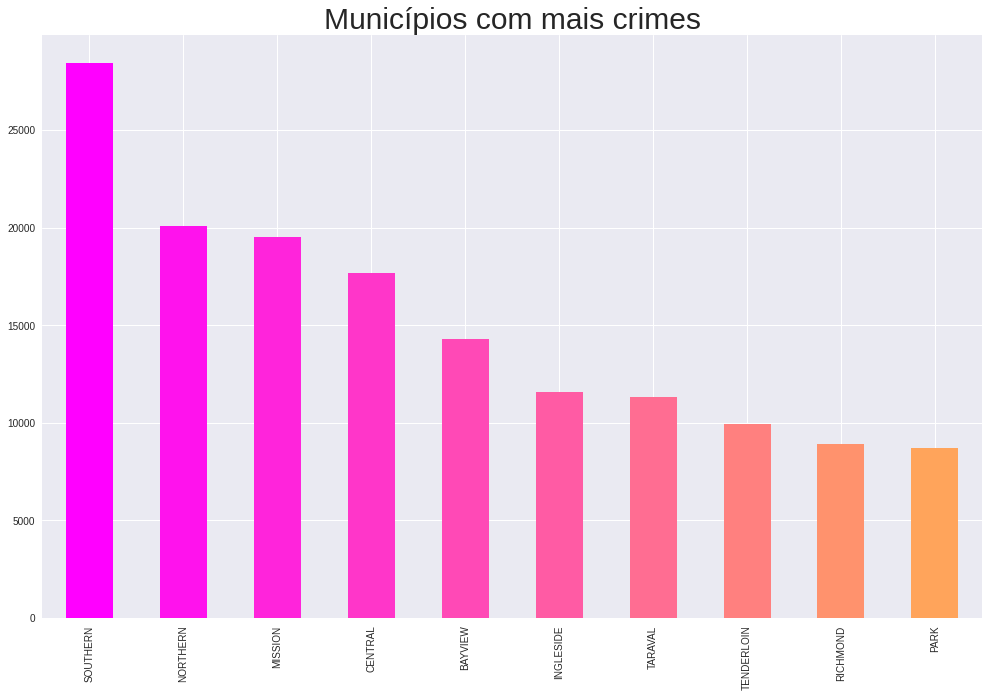

In [25]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')
color = plt.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('Municípios com mais crimes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

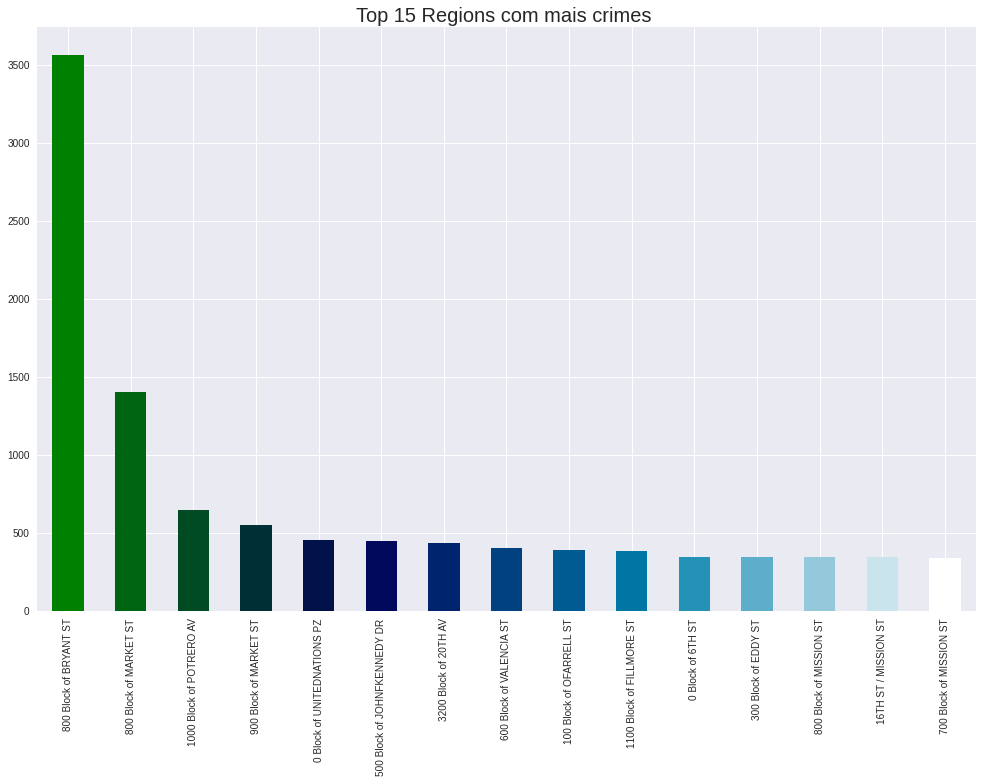

In [26]:

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['Address'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Regions com mais crimes ',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

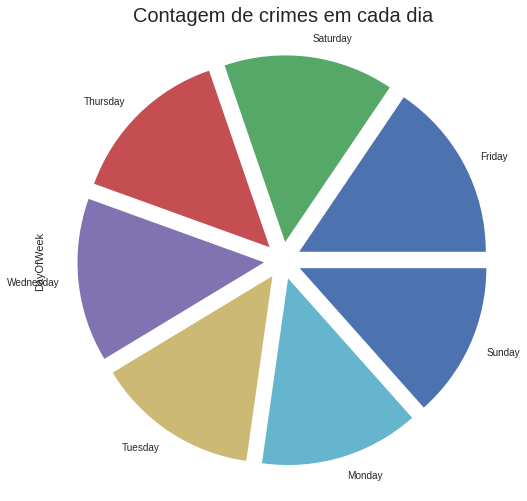

In [27]:
plt.style.use('seaborn')


data['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Contagem de crimes em cada dia',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

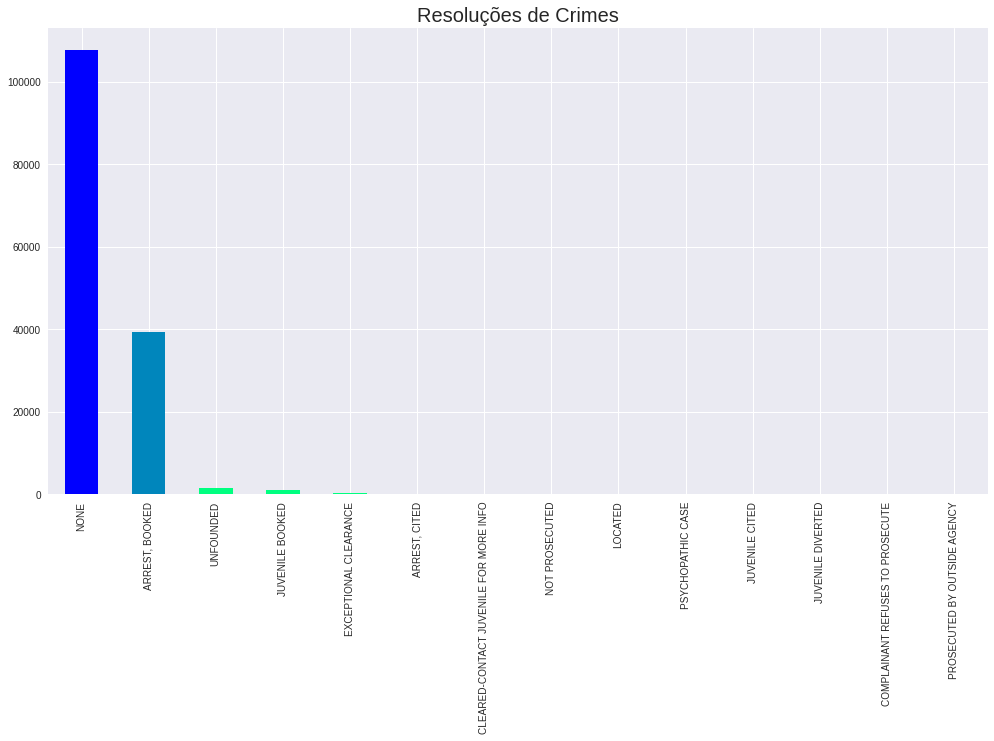

In [28]:
plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
data['Resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Resoluções de Crimes',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

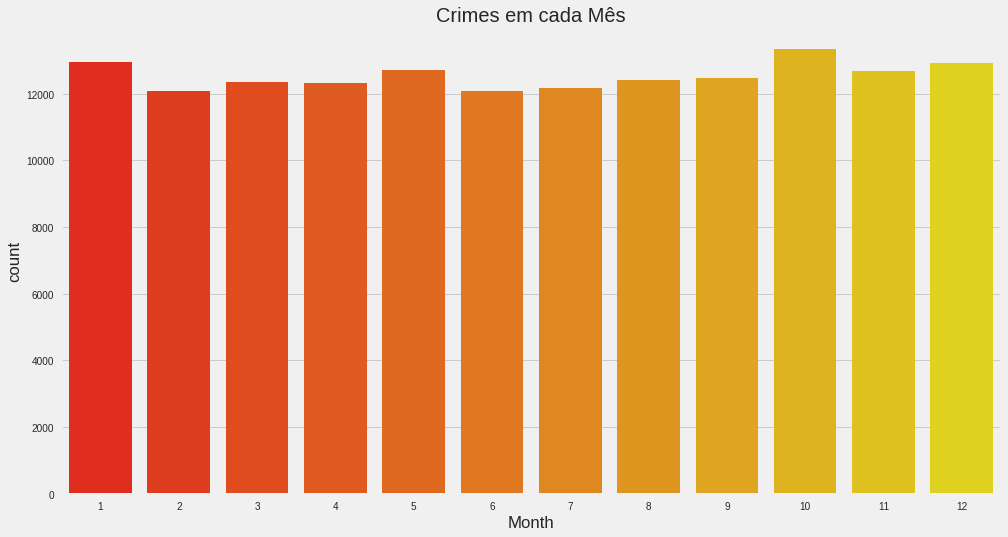

In [29]:
data['Date'] = pd.to_datetime(data['Date']) #converter a data em data

data['Month'] = data['Date'].dt.month   #pegar o mÊs da data

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['Month'], palette = 'autumn',)
plt.title('Crimes em cada Mês', fontsize = 20)

plt.show()

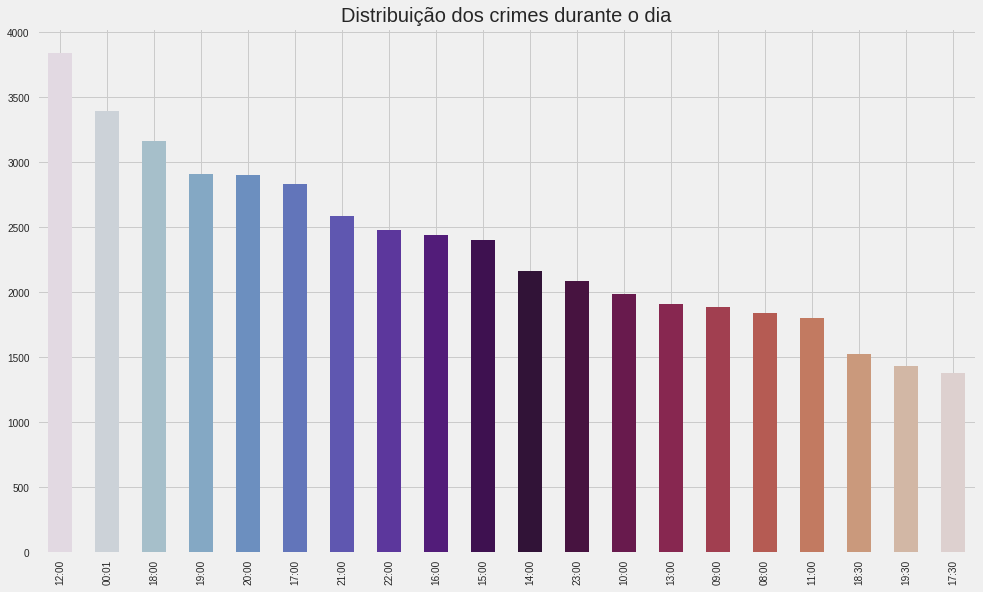

In [30]:
import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribuição dos crimes durante o dia', fontsize = 20)
plt.show()

#Parte teorica para entender Crosstabe
http://www.datasciencemadesimple.com/cross-tab-cross-table-python-pandas/

In [31]:
df=pd.crosstab(data['Category'],data['PdDistrict'])


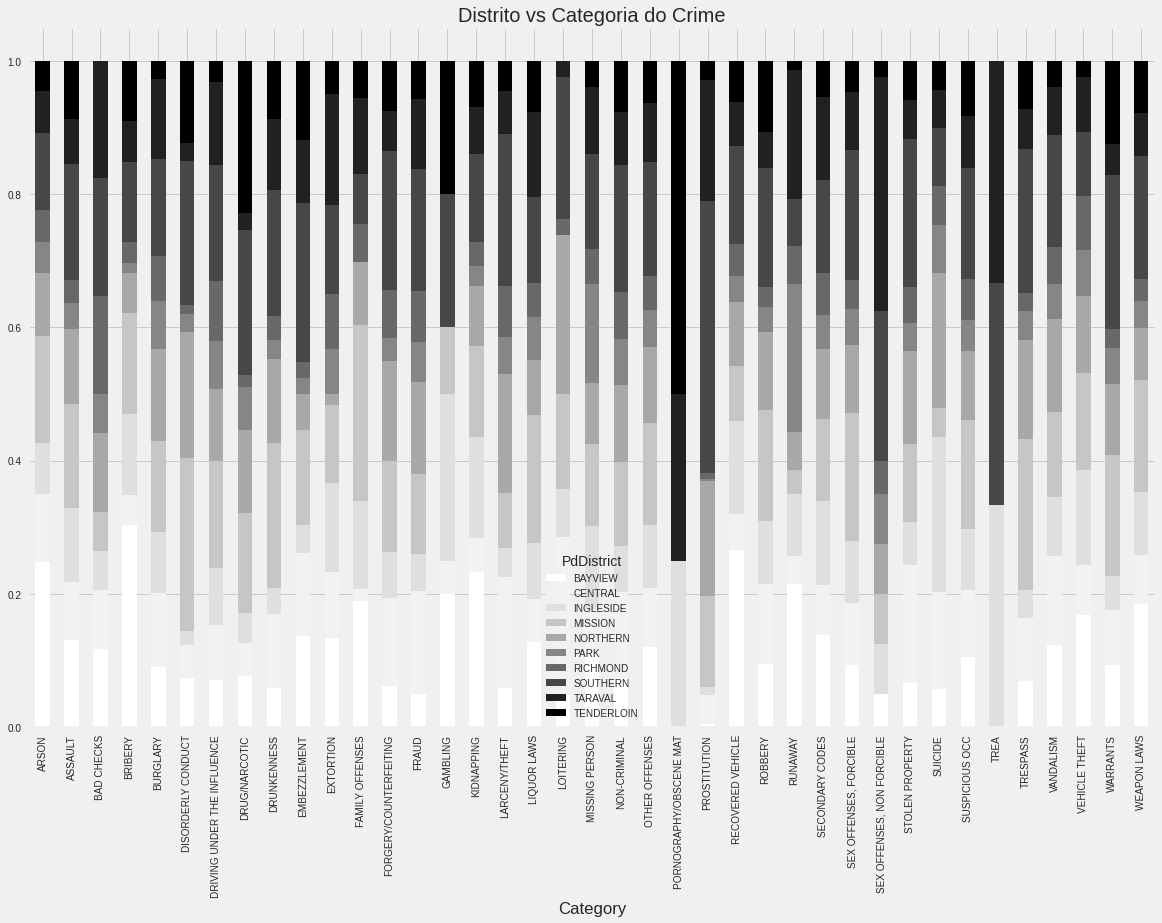

In [34]:
df.div(df.sum(1).astype(float),axis=0).plot.bar(stacked=True,color=color,figsize=(18,12))
color = plt.cm.Greys(np.linspace(0, 1, 10))
plt.title('Distrito vs Categoria do Crime', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#Visualização Geospacial


In [39]:
total=data.PdDistrict.value_counts()
tabela=pd.DataFrame(data=total.values,index=total.index,columns=['Count'])
tabela = tabela.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

tabela = tabela.reset_index()
tabela.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

In [38]:
tabela

,Neighborhood,Count
0,SOUTHERN,28446
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [41]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [43]:
#gerar map
sf_map.choropleth(
    geo_data=gjson,
    data=tabela,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Taxa de criminalidade em San Francisco'
)

In [44]:
sf_map